<h1><center>Climate Change Belief Analysis 2022</center></h1>

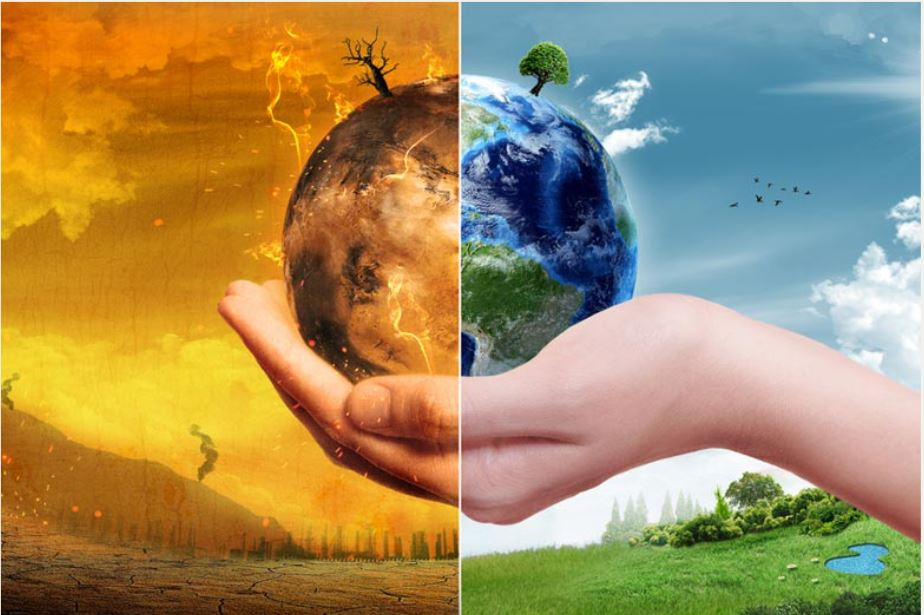

# Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1. [Problem Statement](#problem_statement) <br>
    1.2. [Importing Libraries](#importing_libraries) <br>
    1.3. [Data Description](#data) <br>
    1.4. [Loading Data](#loading_data) <br><br>
    
2. [Data Preprocessing](#preprocessing) <br>
    2.1 [Checking for Null Entries](#null_entries) <br>
    2.2 [Checking for Empty Strings](#empty_strings) <br>
    2.3 [Masking User Handles](#user_handles) <br>
    2.4 [Replacing URLs](#urls) <br>
    2.5 [Delete Punctuations, Numbers and Special Characters](#punctuations) <br>
    2.6 [Removing Stopwords, Converting Words to Lowercase and Lemmatizing](#stopwords) <br><br>

3. [Exploratory Data Analysis](#EDA) <br>
    3.1 [Creating WordCloud](#wordcloud) <br><br>
   
4. [Modeling](#model) <br>
    4.1 [Handling Imbalance Datasets](#imbalancedata) <br>
     <font color=white>.....</font>4.1.1. [Without Resampling](#withoutresample) <br>
     <font color=white>.....</font>4.1.2. [Resampling with Upsampling Technique](#upsample) <br>
     <font color=white>.....</font>4.1.3. [Resampling with Downsampling Technique](#downsample) <br>
     <font color=white>.....</font>4.1.4. [Resampling with SMOTE Technique](#smote) <br>
    4.2 [Model Training](#modeltraining) <br>
     <font color=white>.....</font>4.2.1. [Logistic Regression](#logisticregression) <br>
     <font color=white>.....</font>4.2.2. [Naive Bayes](#naivebayes) <br>
     <font color=white>.....</font>4.2.3. [Support Vector Machine Models](#linearsvc) <br><br>
    
5. [Conclusion and Recommendation](#conclusion_and_recommendation) <br>
    5.1 [Conclusion](#conclusion) <br>
    5.2 [Recommendation](#recommendation) <br><br>

6. [References](#references) <br>

## 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

A shift in a region's regular weather patterns is referred to as climate change. The Earth's climate has grown in temperature during the previous few decades. Local climates all throughout the world are being affected by this trend.

Weather changes are unavoidable. However, weather and climate are not synonymous. The change in temperature and precipitation in a location from day to day is referred to as weather. By glancing outside, you can describe the weather in your neighborhood. Today's weather is if it's snowing right now. Climate, on the other hand, refers to a location's average weather across time. The weather has the potential to change abruptly.

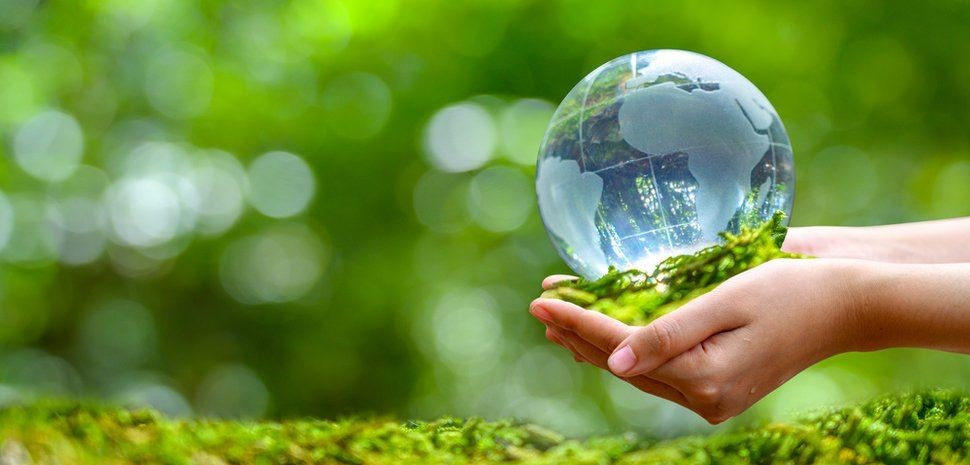

#### Why is the climate changing?

These changes to Earth’s climate are not natural shifts. Scientists are confident that human activities are leading to climate change. Human activities release gases that change the makeup of Earth’s atmosphere. These gases are making our atmosphere better at trapping the Sun's heat. We call this the greenhouse effect.. The greenhouse effect is the main cause of rising temperatures.

So what is the greenhouse effect? Plants can grow better in a greenhouse because it stays warmer than the outside air. This is because heat from the Sun is able to enter the clear glass or plastic. The heat warms the air inside. The heat from the trapped air keeps the greenhouse warm.

### 1.1 Problem Statement<a id="problem_statement"></a>
[Table of Contents](#contents)

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### 1.2 Importing Libraries <a id="importing_libraries"></a>
[Table of Contents](#contents)

In [1]:
import numpy as np
import pandas as pd

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

#Model packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import resample

#Metrics/Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

### 1.3 Data Description<a id="data"></a>
[Table of Contents](#contents)

Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

Files available for download
* train.csv - You will use this data to train your model.
* test.csv - You will use this data to test your model.
* SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

### 1.4 Loading Data<a id="loading_data"></a>
[Table of Contents](#contents)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

The dataframes will be copied so as to make sure the initial dataframes do not change. 

In [3]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

Let’s check the first few rows of the both datasets.

In [4]:
df_train2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
df_test2.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## 2. Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are not masked. We will maske them as *@user*.

- All URLs will be replaced with the word *url*.

- We also get rid of the punctuations, numbers and special characters as they add no value to the machine learning process.

- Most of the smaller words do not add much value. For example, ‘of’, ‘his’, ‘all’. These are called *stopwords*. We will remove them from our data.

- Once we have executed the above steps, we can split every Tweet into individual words. i.e tokens, which is an essential step in any NLP task.

- In the 5th tweet of the train dataset, there is a word ‘racist’. We might also have terms like racism, race, racial, racialist etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘race’, then we can reduce the total number of unique words in our data without losing a significant amount of information. This process is known as *lemmatization*.

- Converting all text to one case. Lowercase will be used here.

But first, let us start by doing the most basic data cleaning processes which include;
- Checking if there are any nulls in the datasets
- Checking if any strings in the datasets are empty

### 2.1 Checking for Null Entries <a id="null_entries"></a>
[Table of Contents](#contents)

In [6]:
# checking nulls in the train set
df_train2.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [7]:
# checking nulls in the test set
df_test2.isnull().sum()

message    0
tweetid    0
dtype: int64

Both datasets have no *Null* values, therefore, no action needs to be taken at this stage.

### 2.2 Checking for Empty Strings<a id="empty_strings"></a>
[Table of Contents](#contents)

In [8]:
# checking for empty strings in the train dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,sentiment,message,tweetid in df_train2.itertuples():  
    # only loop through string values
    if type(message)==str:            
        # check for whitespace
        if message.isspace():         
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

0 Empty String(s):  []


In [9]:
# checking for empty strings in the test dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,message,tweetid in df_test2.itertuples():  
    # only loop through string values
    if type(message)==str: 
        # check for whitespace
        if message.isspace():
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

0 Empty String(s):  []


Both datasets have no empty strings, therefore, no action needs to be taken at this stage.

### 2.3 Masking User Handles<a id="user_handles"></a>
[Table of Contents](#contents)

We are masking the Twitter handles with @user because;
- of privacy concerns. 
- they hardly give any information about the nature of the tweet/sentiments
- having different handle names will add to the total number of unique words in our data 

In [10]:
# masking handles names to @user on train dataset
# define the regular pattern to recognize user handles 
regex_pattern = r'\B@\w+'
# define the substitute text that will be used to replace handle name
sub_text = r'@user'

# replace user handle with substitute text on train dataset
df_train2['message'] = df_train2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)


# replace user handle with substitute text on test dataset
df_test2['message'] = df_test2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)

Let us check if the masking was successful. 

In [11]:
df_train2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @user: Researchers say we have three years ...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @user: It's 2016, and a racist, sexist, cli...",466954


In [12]:
df_test2.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@user @user @user @user \nPutin got to you too...,476263
4,RT @user: 'Female orgasms cause global warming...,872928


We have successfully masked the user handles for both the train and test dataframes. 

### 2.4 Replacing URLs<a id="urls"></a>
[Table of Contents](#contents)

URLs will be replaced with the word *url*;
- so as to reduce the number of uniue values
- because they add no value to our machine learning process. 

In [13]:
# replacing URLs with the word url on train and test datasets
# define the regular pattern to recognize the URLs
regex_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
# define the substitute text that will be used to replace the URLs
sub_text = r'url'

# replace URLs with substitute text on train datatset
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace URLs with substitute text on test datatset
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

We successfully replaced the URLs with 'url' using the regEx function 'r': This is a function that removes or replaces web links,  and email addresses with shorter expressions such as url.

### 2.5 Delete Punctuations, Numbers and Special Characters<a id="punctuations"></a>
[Table of Contents](#contents)

This step is necessary because punctuations, numbers and special characters don't help in differentiating different kinds of tweets. If we skip this step, there is a higher chance that we will be working with noisy and inconsistent data. We will be replacing everything except characters and hashtags with spaces.

In [14]:
# remove special characters, numbers, punctuations on train and test datasets
# define the regular pattern 
regex_pattern = r'[^a-zA-Z#]'
# define the substitute text as a whitespace
sub_text = r' '

# replace the characters on train dataframe
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace the characters on test dataframe
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.6 Removing Stopwords, Converting Words to Lowercase, and Lemmatizing<a id="stopwords"></a>
[Table of Contents](#contents)

Stopwords do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords have been defined by the Natural Language Toolkit (nltk) library so we will start by downloading them.

Lemmatization is defined as "doing things properly using vocabulary and morphological analysis of words"<sup>1</sup>. This process returns the base form of a word, i.e, the *lemma*.
Example: Better - Good. For this step,  we will download WordNet from nltk. WordNet is a lexical database of Englishwhich helps find conceptual relationships between words.<sup>2</sup>

In [15]:
# downloading stopwrods from nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [16]:
# initialize set of stopwords from English dictionary
stop_words = set(stopwords.words("english")) 
# initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to clean the tweets
def clean_tweet(text):
    # convert the text to lowercase
    text = text.lower()
    # lemmatization + tokenization process
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    # removing stopwords
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

# cleaning train dataset
df_train2['cleaned_message'] = df_train2.message.apply(lambda x: clean_tweet(x))

# cleaning test dataset
df_test2['cleaned_message'] = df_test2.message.apply(lambda x: clean_tweet(x))

Let us have a look at what the clean data looks like!

In [17]:
# checking the preprossed train dataframe 
df_train2.head()

,sentiment,message,tweetid,cleaned_message
0,1,PolySciMajor EPA chief doesn t think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,It s not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warm
2,2,RT user Researchers say we have three years ...,698562,rt user researcher say three year act climat...
3,1,#TodayinMaker# WIRED was a pivotal year...,573736,#todayinmaker# wire wa pivotal year war...
4,1,RT user It s and a racist sexist cli...,466954,rt user racist sexist climate change...


In [18]:
# checking the preprossed test dataframe 
df_test2.head()

,message,tweetid,cleaned_message
0,Europe will now be looking to China to make su...,169760,europe look china make sure alone fight climat...
1,Combine this with the polling of staffers re c...,35326,combine poll staffer climate change woman rig...
2,The scary unimpeachable evidence that climate...,224985,scary unimpeachable evidence climate change a...
3,user user user user Putin got to you too ...,476263,user user user user putin get jill tru...
4,RT user Female orgasms cause global warming...,872928,rt user female orgasm cause global warm ...


The preprocessed dataframes look good! We will not move to Exploratory Data Analysis.

## 3. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

In this step, we will start by checking the News, Pro, Neutral and Anti messages frequency distribution in the train dataframe.  

In [19]:
# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

print('Number of news tagged sentences is:     {}'.format(len(news)))
print('Number of pro tagged sentences is:      {}'.format(len(pro)))
print('Number of neutral tagged sentences is:  {}'.format(len(neutral)))
print('Number of anti tagged sentences is:     {}'.format(len(anti)))
print('Total length of the data is:            {}'.format(df_train2.shape[0]))

Number of news tagged sentences is:     3640
Number of pro tagged sentences is:      8530
Number of neutral tagged sentences is:  2353
Number of anti tagged sentences is:     1296
Total length of the data is:            15819


Here is a graphical representation of the same;

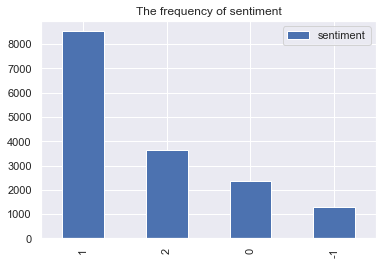

In [20]:
df_train2['sentiment'].value_counts().plot(kind ='bar')
#labels = df_train2['sentiment'].unique()
#label_title = ['pro', 'news', 'neutral', 'anti']
plt.title ('The frequency of sentiment')
#plt.xticks(labels)
plt.legend()
plt.show()

Considering the size of the dataset, the count of sentenses do not seem to be equally distributed between **news, pro, neutral** and **anti**.  **Pro** has the most number of Tweets followed by **news** then **neutral** and finally **anti**. This means that majority of the tweets in this data set support the belief that climate-change is man-made while a majority of the Tweets are opposed to this. 

This uneven distribution of sentiments will affect the accuracy of our model(s). To solve this imbalance, resampling method  (Downscalling and Upscalling), which will involve modifying the number of observations in each class, will be used.

### 3.1 Creating WordCloud<a id="wordcloud"></a>
[Table of Contents](#contents)

We can now analyse the data to get further understanding of it by plotting word clouds for news, pro, netral and anti tweet messages from our train dataset and see which words occur the most.

A word cloud is a collection of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a dataset. We will used the WordCloud library for this scenario. 

From this graphical representation, we can see that the two palceholder values we used during data preporocessing, *@user* and *@url* have weight on the word count yet they do not add any value to our machine learning process. We will therefore delete them on both train and test dataframes. 

In [21]:
# replace @user and url with whitespace on train dataframe
df_train2['cleaned_message'] = df_train2['cleaned_message'] .replace(to_replace = '@user', value = ' ', regex = True)
df_train2['cleaned_message'] = df_train2['cleaned_message'] .replace(to_replace = 'url', value = ' ', regex = True)

# replace @user and urlwith whitespace on test dataframe
df_test2['cleaned_message'] = df_test2['cleaned_message'] .replace(to_replace = '@user', value = ' ', regex = True)
df_test2['cleaned_message'] = df_test2['cleaned_message'] .replace(to_replace = 'url', value = ' ', regex = True)

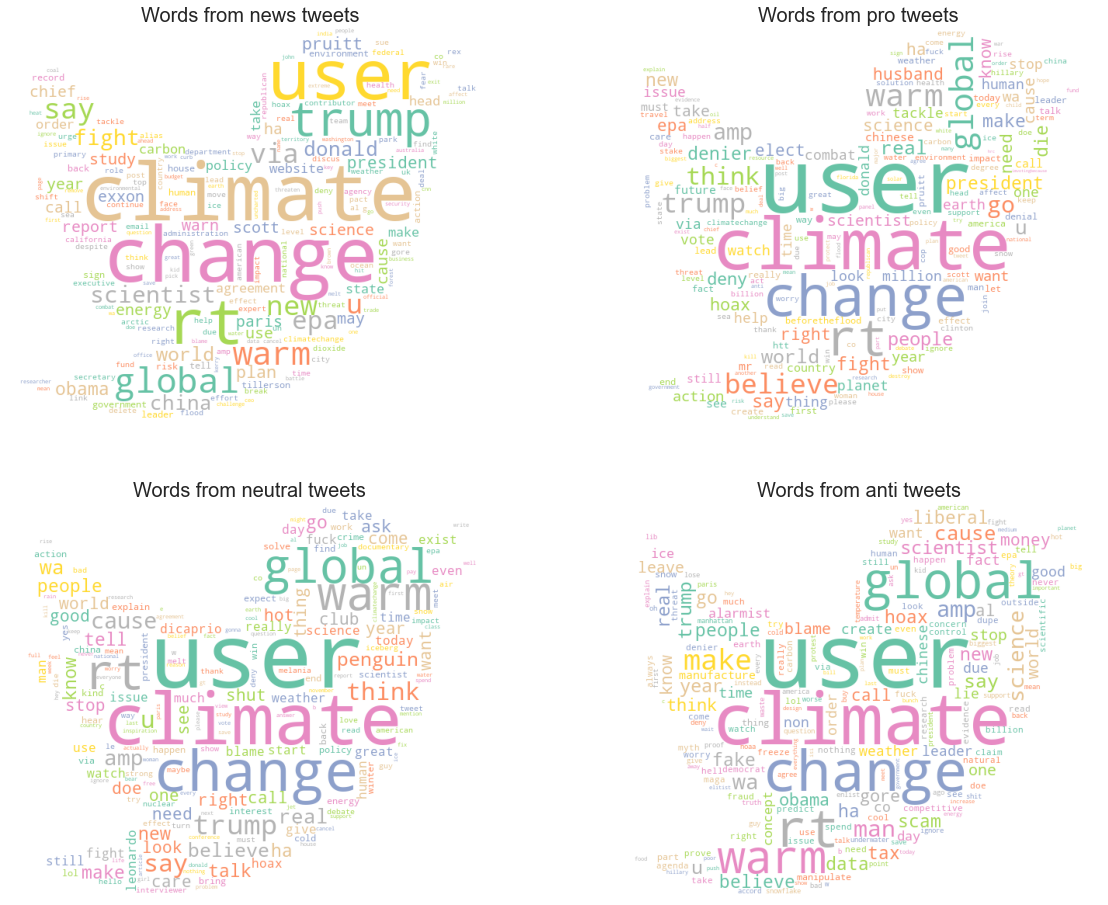

In [22]:
# Generate wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

# Define a function to plot word cloud
def plot_cloud(news, pro, neutral, anti):
    # Import image to np.array
    #mask = np.array(Image.open('comment.png'))
    mask1 = np.array(Image.open('twitter1.png'))
    
    news = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(news))
    
    pro = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(pro))
    
    neutral = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(neutral))
    
    anti = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(anti))
    # Set figure size
    plt.figure(figsize = (20,16))
    plt.subplot(2,2,1)
    plt.title('Words from news tweets', fontsize = 20)
    # Display image
    plt.imshow(news) 
    # No axis details
    plt.axis("off")
    
    
    
    plt.subplot(2,2,2)
    plt.title('Words from pro tweets', fontsize = 20)
    # Display image
    plt.imshow(pro) 
    # No axis details
    plt.axis("off")
    
    
    plt.subplot(2,2,3)
    plt.title('Words from neutral tweets', fontsize = 20)
    # Display image
    plt.imshow(neutral) 
    # No axis details
    plt.axis("off")
    

    plt.subplot(2,2,4)
    plt.title('Words from anti tweets', fontsize = 20)
    # Display image
    plt.imshow(anti) 
    # No axis details
    plt.axis("off")
    

plot_cloud(news, pro, neutral, anti)

## 4. Modeling<a id="model"></a>
[Table of Contents](#contents)

In [23]:
# define split function
def split_train_test(df, feature, target):
    X = df[feature]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)
    return X_train, X_test, y_train, y_test
    

### 4.1 Handling Imbalance Datasets<a id="imbalancedata"></a>
[Table of Contents](#contents)

#### 4.1.1 Without Resampling<a id="withoutresample"></a>
[Table of Contents](#contents)

In [24]:
X_train, X_test, y_train, y_test = split_train_test(df_train2, 'cleaned_message', 'sentiment')

#### 4.1.2 Resampling with Upsampling Technique<a id="upsample"></a>
[Table of Contents](#contents)

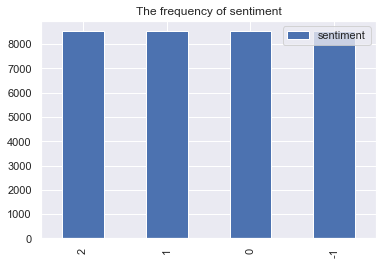

In [25]:
# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# upsample the minority classes
news_upsample = resample(news, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

neutral_upsample = resample(neutral, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

anti_upsample = resample(anti, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

# concatenate the upsampled dataframe
df_train2_upsample = pd.concat([news_upsample, pro, neutral_upsample ,anti_upsample])
df_train2_upsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

#Split upsample into train and test set
X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = split_train_test(df_train2_upsample, 'cleaned_message', 
                                                                                        'sentiment')

#### 4.1.3 Resampling with Downsampling Technique<a id="downsample"></a>
[Table of Contents](#contents)

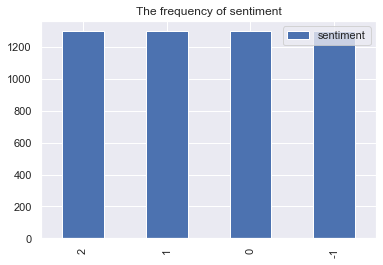

In [26]:
# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# downsample the minority classes

news_downsample = resample(news, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

pro_downsample = resample(pro, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

neutral_downsample = resample(neutral, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)


# concatenate the downsampled dataframe
df_train2_downsample = pd.concat([news_downsample, pro_downsample, neutral_downsample ,anti])
df_train2_downsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample = split_train_test(df_train2_downsample, 
                                                                                                'cleaned_message', 'sentiment')

#### 4.1.4 Resampling with SMOTE Technique<a id="smote"></a>
[Table of Contents](#contents)

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [27]:
X = df_train2['cleaned_message']
y = df_train2['sentiment']
vect = CountVectorizer(max_df=0.90, min_df=2, ngram_range=(1,2), stop_words='english')

# bag-of-words feature matrix
X_vect = vect.fit_transform(X)

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state = 2) 
svmsmote = SVMSMOTE(random_state = 101)

# Fit the model to generate the data.
X_smote, y_smote = svmsmote.fit_resample(X_vect, y)

#Split into train and test set
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote,test_size = 0.2, random_state=20)

In [28]:
#create train model function
def train_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vect', CountVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))

### 4.2 Model Training<a id="modeltraining"></a>
[Table of Contents](#contents)

It's time to train our model now that we've done some pre-processing, EDA, and resampling of our unbalanced data. We'll use a few algorithms from the `sklearn` package to train our model, evaluate its performance, and select the best model, which will be improved by hyperparameter tuning to provide a better forecast.

On various sampled data, ranging from unsampled data to sampling with the SMOTE technique, the following algorithms will be used:
1. Logistic Regression Model
2. Naive Bayes Model
3. Support Vector Classifiers 
4. XGboost

#### 4.2.1 Logistic Regression<a id="logisticregression"></a>
[Table of Contents](#contents)

In [29]:
# Instantiating the Logistic Regression model
model = LogisticRegression()

In [30]:
#Without Resampling
train_model(model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.77      0.30      0.43       272
           0       0.68      0.35      0.47       477
           1       0.70      0.91      0.79      1726
           2       0.75      0.63      0.69       689

    accuracy                           0.71      3164
   macro avg       0.72      0.55      0.59      3164
weighted avg       0.71      0.71      0.69      3164



In [31]:
# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

              precision    recall  f1-score   support

          -1       0.93      0.98      0.95      1691
           0       0.88      0.92      0.90      1663
           1       0.89      0.75      0.81      1767
           2       0.88      0.95      0.91      1703

    accuracy                           0.90      6824
   macro avg       0.90      0.90      0.89      6824
weighted avg       0.90      0.90      0.89      6824



In [32]:
# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

              precision    recall  f1-score   support

          -1       0.70      0.70      0.70       254
           0       0.73      0.64      0.68       253
           1       0.63      0.61      0.62       258
           2       0.69      0.80      0.74       272

    accuracy                           0.69      1037
   macro avg       0.69      0.69      0.69      1037
weighted avg       0.69      0.69      0.69      1037



In [33]:
#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

              precision    recall  f1-score   support

          -1       0.82      0.78      0.80      1701
           0       0.66      0.82      0.73      1635
           1       0.84      0.75      0.79      1755
           2       0.85      0.78      0.82      1733

    accuracy                           0.78      6824
   macro avg       0.79      0.78      0.78      6824
weighted avg       0.79      0.78      0.78      6824



#### 4.2.2 Naive Bayes<a id="naivebayes"></a>
[Table of Contents](#contents)

The Nave Bayes method is a supervised learning technique for addressing classification issues that is based on the Bayes theorem. It is mostly utilized in text classification tasks that require a large training dataset.

The Nave Bayes Classifier is a simple and effective classification method that aids in the development of fast machine learning models capable of making quick predictions<sup>4</sup>.

In `sklearn`, there three implementations of the Naive Bayes method which are:

   i) **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

   ii) **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

   iii) **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with a ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.
   
To train our model using Naive Bayes, we shall only implement the `MultinomialNB` Naive Bayes model.

In [34]:
# Instantiating the MultinomialNB Naive Bayes model
model = MultinomialNB()

In [35]:
# without resampling
train_model(model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       1.00      0.03      0.06       272
           0       1.00      0.06      0.12       477
           1       0.60      0.99      0.75      1726
           2       0.89      0.39      0.55       689

    accuracy                           0.64      3164
   macro avg       0.87      0.37      0.37      3164
weighted avg       0.76      0.64      0.55      3164



In [36]:
# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

              precision    recall  f1-score   support

          -1       0.86      0.97      0.91      1691
           0       0.88      0.90      0.89      1663
           1       0.90      0.64      0.75      1767
           2       0.82      0.95      0.88      1703

    accuracy                           0.86      6824
   macro avg       0.87      0.86      0.86      6824
weighted avg       0.87      0.86      0.86      6824



In [37]:
# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

              precision    recall  f1-score   support

          -1       0.70      0.74      0.72       254
           0       0.75      0.59      0.66       253
           1       0.62      0.66      0.64       258
           2       0.72      0.79      0.75       272

    accuracy                           0.70      1037
   macro avg       0.70      0.69      0.69      1037
weighted avg       0.70      0.70      0.69      1037



In [38]:
#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.66      0.75      1701
           0       0.57      0.83      0.68      1635
           1       0.75      0.71      0.73      1755
           2       0.85      0.72      0.78      1733

    accuracy                           0.73      6824
   macro avg       0.76      0.73      0.73      6824
weighted avg       0.76      0.73      0.73      6824



#### 4.2.3 Support Vector Machine Models<a id="linearsvc"></a>
[Table of Contents](#contents)

Support Vector Machines are classified as a classification method, but they can be used to solve both classification and regression problems. It can handle both continuous and categorical variables with ease. To differentiate various classes, SVM creates a hyperplane in multidimensional space. It iteratively generates the best hyperplane, which is then utilized to minimize an error. The goal of SVM is to find a maximum marginal hyperplane (MMH) that splits a dataset into classes as evenly as possible<sup>3</sup>.

In this session, we shall apply the Support Vector Machine models as we deploy the various kernel available in the SVM model.

##### SVM Kernels

A kernel is used to implement the SVM algorithm in practice. An input data space is transformed into the appropriate form using a kernel. The kernel trick is a technique used by SVM. The kernel transforms a low-dimensional input space into a higher-dimensional space in this case. To put it another way, it turns nonseparable issues into separable problems by adding more dimensions to them. It is most beneficial in problems with non-linear separation. The kernel trick aids in the development of a more accurate classifier.

We shall apply the following kernels:
- Linear Kernel
- Polynomial Kernel
- Radial Basis Function Kernel

#### LinearSVC Model

In [39]:
# Instantiating the Linear SVC model
model = svm.SVC(kernel='linear') # Linear Kernel

In [40]:
# without resampling
train_model(model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.70      0.41      0.52       272
           0       0.65      0.38      0.48       477
           1       0.74      0.87      0.80      1726
           2       0.71      0.71      0.71       689

    accuracy                           0.72      3164
   macro avg       0.70      0.59      0.63      3164
weighted avg       0.72      0.72      0.71      3164



In [41]:
# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97      1691
           0       0.91      0.95      0.93      1663
           1       0.92      0.79      0.85      1767
           2       0.90      0.96      0.93      1703

    accuracy                           0.92      6824
   macro avg       0.92      0.92      0.92      6824
weighted avg       0.92      0.92      0.92      6824



In [42]:
# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

              precision    recall  f1-score   support

          -1       0.71      0.72      0.72       254
           0       0.75      0.65      0.70       253
           1       0.65      0.64      0.65       258
           2       0.73      0.82      0.77       272

    accuracy                           0.71      1037
   macro avg       0.71      0.71      0.71      1037
weighted avg       0.71      0.71      0.71      1037



In [43]:
#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

              precision    recall  f1-score   support

          -1       0.79      0.77      0.78      1701
           0       0.64      0.83      0.72      1635
           1       0.83      0.72      0.77      1755
           2       0.85      0.74      0.79      1733

    accuracy                           0.76      6824
   macro avg       0.78      0.77      0.77      6824
weighted avg       0.78      0.76      0.77      6824



#### PolynomialSVC Model

In [44]:
# Instantiating the Polynomial SVC model
model = svm.SVC(kernel='poly') # Polynomial Kernel

In [45]:
# without resampling
train_model(model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.92      0.12      0.21       272
           0       0.92      0.14      0.24       477
           1       0.61      0.98      0.76      1726
           2       0.89      0.39      0.54       689

    accuracy                           0.65      3164
   macro avg       0.84      0.41      0.44      3164
weighted avg       0.75      0.65      0.58      3164



In [46]:
# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      1691
           0       0.99      0.95      0.97      1663
           1       0.88      0.98      0.93      1767
           2       0.98      0.92      0.95      1703

    accuracy                           0.96      6824
   macro avg       0.96      0.96      0.96      6824
weighted avg       0.96      0.96      0.96      6824



In [47]:
# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

              precision    recall  f1-score   support

          -1       0.39      0.96      0.56       254
           0       0.91      0.46      0.61       253
           1       0.76      0.41      0.53       258
           2       0.93      0.53      0.67       272

    accuracy                           0.59      1037
   macro avg       0.75      0.59      0.59      1037
weighted avg       0.75      0.59      0.59      1037



In [48]:
#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.74      0.75      1701
           0       0.53      0.81      0.64      1635
           1       0.85      0.63      0.73      1755
           2       0.86      0.68      0.76      1733

    accuracy                           0.71      6824
   macro avg       0.75      0.72      0.72      6824
weighted avg       0.75      0.71      0.72      6824



#### Radial Basis Function Model

In [49]:
# Instantiating the Radial Basis Function SVC model
model_svm = svm.SVC(kernel='rbf') # Radial Basis Function Kernel

In [50]:
# without resampling
train_model(model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

          -1       0.92      0.12      0.21       272
           0       0.92      0.14      0.24       477
           1       0.61      0.98      0.76      1726
           2       0.89      0.39      0.54       689

    accuracy                           0.65      3164
   macro avg       0.84      0.41      0.44      3164
weighted avg       0.75      0.65      0.58      3164



In [51]:
# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      1691
           0       0.99      0.95      0.97      1663
           1       0.88      0.98      0.93      1767
           2       0.98      0.92      0.95      1703

    accuracy                           0.96      6824
   macro avg       0.96      0.96      0.96      6824
weighted avg       0.96      0.96      0.96      6824



In [52]:
# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

              precision    recall  f1-score   support

          -1       0.39      0.96      0.56       254
           0       0.91      0.46      0.61       253
           1       0.76      0.41      0.53       258
           2       0.93      0.53      0.67       272

    accuracy                           0.59      1037
   macro avg       0.75      0.59      0.59      1037
weighted avg       0.75      0.59      0.59      1037



In [53]:
#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.74      0.75      1701
           0       0.53      0.81      0.64      1635
           1       0.85      0.63      0.73      1755
           2       0.86      0.68      0.76      1733

    accuracy                           0.71      6824
   macro avg       0.75      0.72      0.72      6824
weighted avg       0.75      0.71      0.72      6824



## Model Evaluation

At this point, we shall evaluate our models by critically studying the different metrics calculated for each model above. Already, we have generated the classification report of each model trained which contains some metrics which shall be briefly discussed below:

- **Precision**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score**: A combination (harmonic mean) of precission and recall. A perfect model achieves an F1 score of 1.0.
- **Support**: The number of samples each metric was calculated on.
- **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg**: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into account so if you do have class imbalances, pay attention to this metric.
- **Weighted avg**: Short for weighted average, the weighted average of precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples are there in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Accuracy scores

In [54]:
# Create a dictionary contaning all accuracy scores from our trained models
dict_accuracy = {
    'Logistic Regression': {
        'without resampling': 0.71,
        'upsample': 0.90,
        'downsample': 0.69,
        'SMOTE': 0.78
    },
    'Naive Bayes': {
        'without resampling': 0.64,
        'upsample': 0.86,
        'downsample': 0.70,
        'SMOTE': 0.73
    },
    'Linear SVC': {
        'without resampling': 0.72,
        'upsample': 0.92,
        'downsample': 0.71,
        'SMOTE': 0.76
    },
    'Polynomial SVC': {
        'without resampling': 0.65,
        'upsample': 0.96,
        'downsample': 0.59,
        'SMOTE': 0.71
    },
    'RBE SVC': {
        'without resampling': 0.65,
        'upsample': 0.96,
        'downsample': 0.59,
        'SMOTE': 0.71
    }
}

# Converting the dictionary into a pandas dataframe 
df_dict_accuracy = pd.DataFrame(dict_accuracy)

# Reseting index
df = df_dict_accuracy.reset_index()

# Renaming the column title 'index' to 'Resampling Technique'
df.rename(columns={'index':'Resampling Technique'}, inplace=True)

# Display the table containg all accuracy scores for each model and sampling technique
df

,Resampling Technique,Logistic Regression,Naive Bayes,Linear SVC,Polynomial SVC,RBE SVC
0,without resampling,0.71,0.64,0.72,0.65,0.65
1,upsample,0.90,0.86,0.92,0.96,0.96
2,downsample,0.69,0.70,0.71,0.59,0.59
3,SMOTE,0.78,0.73,0.76,0.71,0.71


**Creating a bar plot to compare the accuracy scores visually**

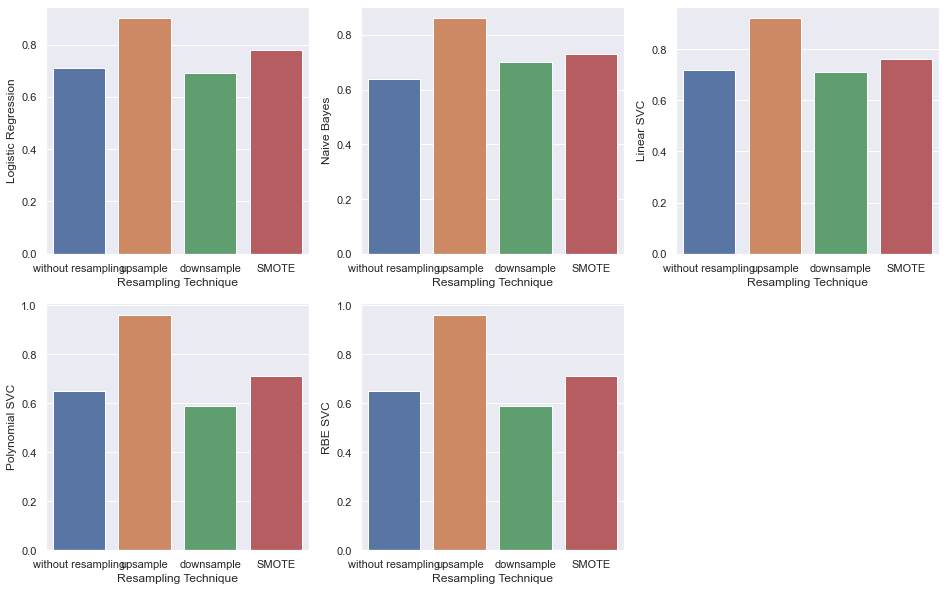

In [55]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
sns.barplot(x = 'Resampling Technique',  y ='Logistic Regression', data = df)

plt.subplot(2, 3, 2)
sns.barplot(x = 'Resampling Technique',  y ='Naive Bayes', data = df)

plt.subplot(2, 3, 3)
sns.barplot(x = 'Resampling Technique',  y ='Linear SVC', data = df)

plt.subplot(2, 3, 4)
sns.barplot(x = 'Resampling Technique',  y ='Polynomial SVC', data = df)

plt.subplot(2, 3, 5)
sns.barplot(x = 'Resampling Technique',  y ='RBE SVC', data = df)

plt.show()

## 5. Conclusion and Recommendation<a id="conclusion_and_recommendation"></a>
[Table of Contents](#contents)

### 5.1 Conclusion<a id="conclusion"></a>
[Table of Contents](#contents)

### 5.2 Recommendation<a id="recommendation"></a>
[Table of Contents](#contents)

## 6. References<a id="references"></a>
[Table of Contents](#contents)

1. Stemming and lemmatization - Stanford NLP Group: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. Source code for nltk.corpus.reader.wordnet: https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html
3. Support Vector Machines with Scikit-learn Tutorial: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
4. Naïve Bayes Classifier Algorithm: https://www.javatpoint.com/machine-learning-naive-bayes-classifier

In [ ]:
<h1><center>Climate Change Belief Analysis 2022</center></h1>

![climate.JPG](attachment:climate.JPG)

# Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1. [Problem Statement](#problem_statement) <br>
    1.2. [Importing Libraries](#importing_libraries) <br>
    1.3. [Data Description](#data) <br>
    1.4. [Loading Data](#loading_data) <br><br>
    
2. [Data Preprocessing](#preprocessing) <br>
    2.1 [Checking for Null Entries](#null_entries) <br>
    2.2 [Checking for Empty Strings](#empty_strings) <br>
    2.3 [Masking User Handles](#user_handles) <br>
    2.4 [Replacing URLs](#urls) <br>
    2.5 [Delete Punctuations, Numbers and Special Characters](#punctuations) <br>
    2.6 [Removing Stopwords, Converting Words to Lowercase and Lemmatizing](#stopwords) <br><br>

3. [Exploratory Data Analysis](#EDA) <br>
    3.1 [Creating WordCloud](#wordcloud) <br><br>
   
4. [Modeling](#model) <br>
    4.1 [Handling Imbalance Datasets](#imbalancedata) <br>
     <font color=white>.....</font>4.1.1. [Without Resampling](#withoutresample) <br>
     <font color=white>.....</font>4.1.2. [Resampling with Upsampling Technique](#upsample) <br>
     <font color=white>.....</font>4.1.3. [Resampling with Downsampling Technique](#downsample) <br>
     <font color=white>.....</font>4.1.4. [Resampling with SMOTE Technique](#smote) <br>
    4.2 [Model Training](#modeltraining) <br>
     <font color=white>.....</font>4.2.1. [Logistic Regression](#logisticregression) <br>
     <font color=white>.....</font>4.2.2. [Naive Bayes](#naivebayes) <br>
     <font color=white>.....</font>4.2.3. [Support Vector Machine Models](#linearsvc) <br><br>
    
5. [Conclusion and Recommendation](#conclusion_and_recommendation) <br>
    5.1 [Conclusion](#conclusion) <br>
    5.2 [Recommendation](#recommendation) <br><br>

6. [References](#references) <br>

## 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

A shift in a region's regular weather patterns is referred to as climate change. The Earth's climate has grown in temperature during the previous few decades. Local climates all throughout the world are being affected by this trend.

Weather changes are unavoidable. However, weather and climate are not synonymous. The change in temperature and precipitation in a location from day to day is referred to as weather. By glancing outside, you can describe the weather in your neighborhood. Today's weather is if it's snowing right now. Climate, on the other hand, refers to a location's average weather across time. The weather has the potential to change abruptly.

![climate-change.jpg](attachment:climate-change.jpg)

#### Why is the climate changing?

These changes to Earth’s climate are not natural shifts. Scientists are confident that human activities are leading to climate change. Human activities release gases that change the makeup of Earth’s atmosphere. These gases are making our atmosphere better at trapping the Sun's heat. We call this the greenhouse effect.. The greenhouse effect is the main cause of rising temperatures.

So what is the greenhouse effect? Plants can grow better in a greenhouse because it stays warmer than the outside air. This is because heat from the Sun is able to enter the clear glass or plastic. The heat warms the air inside. The heat from the trapped air keeps the greenhouse warm.

### 1.1 Problem Statement<a id="problem_statement"></a>
[Table of Contents](#contents)

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### 1.2 Importing Libraries <a id="importing_libraries"></a>
[Table of Contents](#contents)

import numpy as np
import pandas as pd

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

#Model packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import resample

#Metrics/Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

### 1.3 Data Description<a id="data"></a>
[Table of Contents](#contents)

Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

Files available for download
* train.csv - You will use this data to train your model.
* test.csv - You will use this data to test your model.
* SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

### 1.4 Loading Data<a id="loading_data"></a>
[Table of Contents](#contents)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

The dataframes will be copied so as to make sure the initial dataframes do not change. 

df_train2 = df_train.copy()
df_test2 = df_test.copy()

Let’s check the first few rows of the both datasets.

df_train2.head()

df_test2.head()

## 2. Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are not masked. We will maske them as *@user*.

- All URLs will be replaced with the word *url*.

- We also get rid of the punctuations, numbers and special characters as they add no value to the machine learning process.

- Most of the smaller words do not add much value. For example, ‘of’, ‘his’, ‘all’. These are called *stopwords*. We will remove them from our data.

- Once we have executed the above steps, we can split every Tweet into individual words. i.e tokens, which is an essential step in any NLP task.

- In the 5th tweet of the train dataset, there is a word ‘racist’. We might also have terms like racism, race, racial, racialist etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘race’, then we can reduce the total number of unique words in our data without losing a significant amount of information. This process is known as *lemmatization*.

- Converting all text to one case. Lowercase will be used here.

But first, let us start by doing the most basic data cleaning processes which include;
- Checking if there are any nulls in the datasets
- Checking if any strings in the datasets are empty

### 2.1 Checking for Null Entries <a id="null_entries"></a>
[Table of Contents](#contents)

# checking nulls in the train set
df_train2.isnull().sum()

# checking nulls in the test set
df_test2.isnull().sum()

Both datasets have no *Null* values, therefore, no action needs to be taken at this stage.

### 2.2 Checking for Empty Strings<a id="empty_strings"></a>
[Table of Contents](#contents)

# checking for empty strings in the train dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,sentiment,message,tweetid in df_train2.itertuples():  
    # only loop through string values
    if type(message)==str:            
        # check for whitespace
        if message.isspace():         
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

# checking for empty strings in the test dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,message,tweetid in df_test2.itertuples():  
    # only loop through string values
    if type(message)==str: 
        # check for whitespace
        if message.isspace():
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

Both datasets have no empty strings, therefore, no action needs to be taken at this stage.

### 2.3 Masking User Handles<a id="user_handles"></a>
[Table of Contents](#contents)

We are masking the Twitter handles with @user because;
- of privacy concerns. 
- they hardly give any information about the nature of the tweet/sentiments
- having different handle names will add to the total number of unique words in our data 

# masking handles names to @user on train dataset
# define the regular pattern to recognize user handles 
regex_pattern = r'\B@\w+'
# define the substitute text that will be used to replace handle name
sub_text = r'@user'

# replace user handle with substitute text on train dataset
df_train2['message'] = df_train2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)


# replace user handle with substitute text on test dataset
df_test2['message'] = df_test2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)

Let us check if the masking was successful. 

df_train2.head()

df_test2.head()

We have successfully masked the user handles for both the train and test dataframes. 

### 2.4 Replacing URLs<a id="urls"></a>
[Table of Contents](#contents)

URLs will be replaced with the word *url*;
- so as to reduce the number of uniue values
- because they add no value to our machine learning process. 

# replacing URLs with the word url on train and test datasets
# define the regular pattern to recognize the URLs
regex_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
# define the substitute text that will be used to replace the URLs
sub_text = r'url'

# replace URLs with substitute text on train datatset
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace URLs with substitute text on test datatset
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.5 Delete Punctuations, Numbers and Special Characters<a id="punctuations"></a>
[Table of Contents](#contents)

This step is necessary because punctuations, numbers and special characters don't help in differentiating different kinds of tweets. If we skip this step, there is a higher chance that we will be working with noisy and inconsistent data. We will be replacing everything except characters and hashtags with spaces.

# remove special characters, numbers, punctuations on train and test datasets
# define the regular pattern 
regex_pattern = r'[^a-zA-Z#]'
# define the substitute text as a whitespace
sub_text = r' '

# replace the characters on train dataframe
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace the characters on test dataframe
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.6 Removing Stopwords, Converting Words to Lowercase, and Lemmatizing<a id="stopwords"></a>
[Table of Contents](#contents)

Stopwords do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords have been defined by the Natural Language Toolkit (nltk) library so we will start by downloading them.

Lemmatization is defined as "doing things properly using vocabulary and morphological analysis of words"<sup>1</sup>. This process returns the base form of a word, i.e, the *lemma*.
Example: Better - Good. For this step,  we will download WordNet from nltk. WordNet is a lexical database of Englishwhich helps find conceptual relationships between words.<sup>2</sup>

# downloading stopwrods from nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

# initialize set of stopwords from English dictionary
stop_words = set(stopwords.words("english")) 
# initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to clean the tweets
def clean_tweet(text):
    # convert the text to lowercase
    text = text.lower()
    # lemmatization + tokenization process
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    # removing stopwords
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

# cleaning train dataset
df_train2['cleaned_message'] = df_train2.message.apply(lambda x: clean_tweet(x))

# cleaning test dataset
df_test2['cleaned_message'] = df_test2.message.apply(lambda x: clean_tweet(x))

Let us have a look at what the clean data looks like!

# checking the preprossed train dataframe 
df_train2.head()

# checking the preprossed test dataframe 
df_test2.head()

The preprocessed dataframes look good! We will not move to Exploratory Data Analysis.

## 3. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

In this step, we will start by checking the News, Pro, Neutral and Anti messages frequency distribution in the train dataframe.  

# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

print('Number of news tagged sentences is:     {}'.format(len(news)))
print('Number of pro tagged sentences is:      {}'.format(len(pro)))
print('Number of neutral tagged sentences is:  {}'.format(len(neutral)))
print('Number of anti tagged sentences is:     {}'.format(len(anti)))
print('Total length of the data is:            {}'.format(df_train2.shape[0]))

Here is a graphical representation of the same;

df_train2['sentiment'].value_counts().plot(kind ='bar')
#labels = df_train2['sentiment'].unique()
#label_title = ['pro', 'news', 'neutral', 'anti']
plt.title ('The frequency of sentiment')
#plt.xticks(labels)
plt.legend()
plt.show()

Considering the size of the dataset, the count of sentenses do not seem to be equally distributed between **news, pro, neutral** and **anti**.  **Pro** has the most number of Tweets followed by **news** then **neutral** and finally **anti**. This means that majority of the tweets in this data set support the belief that climate-change is man-made while a majority of the Tweets are opposed to this. 

This uneven distribution of sentiments will affect the accuracy of our model(s). To solve this imbalance, resampling method  (Downscalling and Upscalling), which will involve modifying the number of observations in each class, will be used.

### 3.1 Creating WordCloud<a id="wordcloud"></a>
[Table of Contents](#contents)

We can now analyse the data to get further understanding of it by plotting word clouds for news, pro, netral and anti tweet messages from our train dataset and see which words occur the most.

A word cloud is a collection of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a dataset. We will used the WordCloud library for this scenario. 

From this graphical representation, we can see that the two palceholder values we used during data preporocessing, *@user* and *@url* have weight on the word count yet they do not add any value to our machine learning process. We will therefore delete them on both train and test dataframes. 

# replace @user and url with whitespace on train dataframe
df_train2['cleaned_message'] = df_train2['cleaned_message'] .replace(to_replace = '@user', value = ' ', regex = True)
df_train2['cleaned_message'] = df_train2['cleaned_message'] .replace(to_replace = 'url', value = ' ', regex = True)

# replace @user and urlwith whitespace on test dataframe
df_test2['cleaned_message'] = df_test2['cleaned_message'] .replace(to_replace = '@user', value = ' ', regex = True)
df_test2['cleaned_message'] = df_test2['cleaned_message'] .replace(to_replace = 'url', value = ' ', regex = True)

# Generate wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

# Define a function to plot word cloud
def plot_cloud(news, pro, neutral, anti):
    # Import image to np.array
    #mask = np.array(Image.open('comment.png'))
    mask1 = np.array(Image.open('twitter1.png'))
    
    news = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(news))
    
    pro = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(pro))
    
    neutral = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(neutral))
    
    anti = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(anti))
    # Set figure size
    plt.figure(figsize = (20,16))
    plt.subplot(2,2,1)
    plt.title('Words from news tweets', fontsize = 20)
    # Display image
    plt.imshow(news) 
    # No axis details
    plt.axis("off")
    
    
    
    plt.subplot(2,2,2)
    plt.title('Words from pro tweets', fontsize = 20)
    # Display image
    plt.imshow(pro) 
    # No axis details
    plt.axis("off")
    
    
    plt.subplot(2,2,3)
    plt.title('Words from neutral tweets', fontsize = 20)
    # Display image
    plt.imshow(neutral) 
    # No axis details
    plt.axis("off")
    

    plt.subplot(2,2,4)
    plt.title('Words from anti tweets', fontsize = 20)
    # Display image
    plt.imshow(anti) 
    # No axis details
    plt.axis("off")
    

plot_cloud(news, pro, neutral, anti)

## 4. Modeling<a id="model"></a>
[Table of Contents](#contents)

# define split function
def split_train_test(df, feature, target):
    X = df[feature]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)
    return X_train, X_test, y_train, y_test
    

### 4.1 Handling Imbalance Datasets<a id="imbalancedata"></a>
[Table of Contents](#contents)

#### 4.1.1 Without Resampling<a id="withoutresample"></a>
[Table of Contents](#contents)

X_train, X_test, y_train, y_test = split_train_test(df_train2, 'cleaned_message', 'sentiment')

#### 4.1.2 Resampling with Upsampling Technique<a id="upsample"></a>
[Table of Contents](#contents)

# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# upsample the minority classes
news_upsample = resample(news, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

neutral_upsample = resample(neutral, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

anti_upsample = resample(anti, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

# concatenate the upsampled dataframe
df_train2_upsample = pd.concat([news_upsample, pro, neutral_upsample ,anti_upsample])
df_train2_upsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

#Split upsample into train and test set
X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = split_train_test(df_train2_upsample, 'cleaned_message', 
                                                                                        'sentiment')

#### 4.1.3 Resampling with Downsampling Technique<a id="downsample"></a>
[Table of Contents](#contents)

# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# downsample the minority classes

news_downsample = resample(news, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

pro_downsample = resample(pro, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

neutral_downsample = resample(neutral, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)


# concatenate the downsampled dataframe
df_train2_downsample = pd.concat([news_downsample, pro_downsample, neutral_downsample ,anti])
df_train2_downsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample = split_train_test(df_train2_downsample, 
                                                                                                'cleaned_message', 'sentiment')

#### 4.1.4 Resampling with SMOTE Technique<a id="smote"></a>
[Table of Contents](#contents)

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

X = df_train2['cleaned_message']
y = df_train2['sentiment']
vect = CountVectorizer(max_df=0.90, min_df=2, ngram_range=(1,2), stop_words='english')

# bag-of-words feature matrix
X_vect = vect.fit_transform(X)

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state = 2) 
svmsmote = SVMSMOTE(random_state = 101)

# Fit the model to generate the data.
X_smote, y_smote = svmsmote.fit_resample(X_vect, y)

#Split into train and test set
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote,test_size = 0.2, random_state=20)

#create train model function
def train_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vect', CountVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))

### 4.2 Model Training<a id="modeltraining"></a>
[Table of Contents](#contents)

It's time to train our model now that we've done some pre-processing, EDA, and resampling of our unbalanced data. We'll use a few algorithms from the `sklearn` package to train our model, evaluate its performance, and select the best model, which will be improved by hyperparameter tuning to provide a better forecast.

On various sampled data, ranging from unsampled data to sampling with the SMOTE technique, the following algorithms will be used:
1. Logistic Regression Model
2. Naive Bayes Model
3. Support Vector Classifiers 
4. XGboost

#### 4.2.1 Logistic Regression<a id="logisticregression"></a>
[Table of Contents](#contents)

# Instantiating the Logistic Regression model
model = LogisticRegression()

#Without Resampling
train_model(model, X_train, X_test, y_train, y_test)

# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

#### 4.2.2 Naive Bayes<a id="naivebayes"></a>
[Table of Contents](#contents)

The Nave Bayes method is a supervised learning technique for addressing classification issues that is based on the Bayes theorem. It is mostly utilized in text classification tasks that require a large training dataset.

The Nave Bayes Classifier is a simple and effective classification method that aids in the development of fast machine learning models capable of making quick predictions<sup>4</sup>.

In `sklearn`, there three implementations of the Naive Bayes method which are:

   i) **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

   ii) **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

   iii) **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with a ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.
   
To train our model using Naive Bayes, we shall only implement the `MultinomialNB` Naive Bayes model.

# Instantiating the MultinomialNB Naive Bayes model
model = MultinomialNB()

# without resampling
train_model(model, X_train, X_test, y_train, y_test)

# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

#### 4.2.3 Support Vector Machine Models<a id="linearsvc"></a>
[Table of Contents](#contents)

Support Vector Machines are classified as a classification method, but they can be used to solve both classification and regression problems. It can handle both continuous and categorical variables with ease. To differentiate various classes, SVM creates a hyperplane in multidimensional space. It iteratively generates the best hyperplane, which is then utilized to minimize an error. The goal of SVM is to find a maximum marginal hyperplane (MMH) that splits a dataset into classes as evenly as possible<sup>3</sup>.

In this session, we shall apply the Support Vector Machine models as we deploy the various kernel available in the SVM model.

##### SVM Kernels

A kernel is used to implement the SVM algorithm in practice. An input data space is transformed into the appropriate form using a kernel. The kernel trick is a technique used by SVM. The kernel transforms a low-dimensional input space into a higher-dimensional space in this case. To put it another way, it turns nonseparable issues into separable problems by adding more dimensions to them. It is most beneficial in problems with non-linear separation. The kernel trick aids in the development of a more accurate classifier.

We shall apply the following kernels:
- Linear Kernel
- Polynomial Kernel
- Radial Basis Function Kernel

#### LinearSVC Model

# Instantiating the Linear SVC model
model = svm.SVC(kernel='linear') # Linear Kernel

# without resampling
train_model(model, X_train, X_test, y_train, y_test)

# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

#### PolynomialSVC Model

# Instantiating the Polynomial SVC model
model = svm.SVC(kernel='poly') # Polynomial Kernel

# without resampling
train_model(model, X_train, X_test, y_train, y_test)

# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

#### Radial Basis Function Model

# Instantiating the Radial Basis Function SVC model
model_svm = svm.SVC(kernel='rbf') # Radial Basis Function Kernel

# without resampling
train_model(model, X_train, X_test, y_train, y_test)

# With upsampling
train_model(model, X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample)

# With downsampling
train_model(model, X_train_downsample, X_test_downsample, y_train_downsample, y_test_downsample)

#With SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred))

## Model Evaluation

At this point, we shall evaluate our models by critically studying the different metrics calculated for each model above. Already, we have generated the classification report of each model trained which contains some metrics which shall be briefly discussed below:

- **Precision**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score**: A combination (harmonic mean) of precission and recall. A perfect model achieves an F1 score of 1.0.
- **Support**: The number of samples each metric was calculated on.
- **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg**: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into account so if you do have class imbalances, pay attention to this metric.
- **Weighted avg**: Short for weighted average, the weighted average of precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples are there in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Accuracy scores

# Create a dictionary contaning all accuracy scores from our trained models
dict_accuracy = {
    'Logistic Regression': {
        'without resampling': 0.71,
        'upsample': 0.90,
        'downsample': 0.69,
        'SMOTE': 0.78
    },
    'Naive Bayes': {
        'without resampling': 0.64,
        'upsample': 0.86,
        'downsample': 0.70,
        'SMOTE': 0.73
    },
    'Linear SVC': {
        'without resampling': 0.72,
        'upsample': 0.92,
        'downsample': 0.71,
        'SMOTE': 0.76
    },
    'Polynomial SVC': {
        'without resampling': 0.65,
        'upsample': 0.96,
        'downsample': 0.59,
        'SMOTE': 0.71
    },
    'RBE SVC': {
        'without resampling': 0.65,
        'upsample': 0.96,
        'downsample': 0.59,
        'SMOTE': 0.71
    }
}

# Converting the dictionary into a pandas dataframe 
df_dict_accuracy = pd.DataFrame(dict_accuracy)

# Reseting index
df = df_dict_accuracy.reset_index()

# Renaming the column title 'index' to 'Resampling Technique'
df.rename(columns={'index':'Resampling Technique'}, inplace=True)

# Display the table containg all accuracy scores for each model and sampling technique
df

**Creating a bar plot to compare the accuracy scores visually**

plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
sns.barplot(x = 'Resampling Technique',  y ='Logistic Regression', data = df)

plt.subplot(2, 3, 2)
sns.barplot(x = 'Resampling Technique',  y ='Naive Bayes', data = df)

plt.subplot(2, 3, 3)
sns.barplot(x = 'Resampling Technique',  y ='Linear SVC', data = df)

plt.subplot(2, 3, 4)
sns.barplot(x = 'Resampling Technique',  y ='Polynomial SVC', data = df)

plt.subplot(2, 3, 5)
sns.barplot(x = 'Resampling Technique',  y ='RBE SVC', data = df)

plt.show()



## 5. Conclusion and Recommendation<a id="conclusion_and_recommendation"></a>
[Table of Contents](#contents)





### 5.1 Conclusion<a id="conclusion"></a>
[Table of Contents](#contents)





### 5.2 Recommendation<a id="recommendation"></a>
[Table of Contents](#contents)





## 6. References<a id="references"></a>
[Table of Contents](#contents)

1. Stemming and lemmatization - Stanford NLP Group: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. Source code for nltk.corpus.reader.wordnet: https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html
3. Support Vector Machines with Scikit-learn Tutorial: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
4. Naïve Bayes Classifier Algorithm: https://www.javatpoint.com/machine-learning-naive-bayes-classifier

